In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import multiprocessing
from vedo import dataurl, printc, Plotter, Points, Mesh, Text2D
import pytorch3d
import importlib
import obj_2_pcd
import render_inference_result
importlib.reload(obj_2_pcd)
importlib.reload(render_inference_result)

import torch
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

import torchvision.transforms as transforms





In [20]:
index = 0
img_dir = '/data/jhahn/data/brain_lightsheet/0408'

output_dir = 'output'
tickness = 0.02

['0089.obj',
 '0096.obj',
 '0103.obj',
 '0110.obj',
 '0117.obj',
 '0124.obj',
 '0131.obj',
 '0138.obj',
 '0145.obj',
 '0152.obj',
 '0159.obj',
 '0166.obj',
 '0173.obj',
 '0180.obj',
 '0187.obj',
 '0194.obj',
 '0201.obj',
 '0208.obj']

In [ ]:



data_id = '0168'
tiff_filename_full = f'{img_dir}/{data_id}.tif'
pcd_filename_1 = obj_2_pcd.tiff_2_pcd(0.0,tiff_filename_full, output_dir, tickness)
vertices_1 = pytorch3d.io.load_obj(pcd_filename_1, device=device)[0]
render_inference_result.pcd_2_img(device, f'{output_dir}/{data_id}.obj',f'{output_dir}/{data_id}.png', xlim=(-9000, 0), ylim=(-9000, 0), zlim=(-9000, 0))


data_id = '0180'
tiff_filename_full = f'{img_dir}/{data_id}.tif'
pcd_filename_2 = obj_2_pcd.tiff_2_pcd(tickness*4,tiff_filename_full, output_dir, tickness)
vertices_2 = pytorch3d.io.load_obj(pcd_filename_2, device=device)[0]
render_inference_result.pcd_2_img(device, f'{output_dir}/{data_id}.obj',f'{output_dir}/{data_id}.png', xlim=(-9000, 0), ylim=(-9000, 0), zlim=(-9000, 0))


print(torch.max(vertices_1, axis=0)[0])
print(torch.min(vertices_1, axis=0)[0])
print(torch.max(vertices_2, axis=0)[0])
print(torch.min(vertices_2, axis=0)[0])


In [18]:
data_id = '0091'
img_dir = '/data/jhahn/data/shape_dataset/data/brain_lightsheet/0408_0091_215_random_rotation/fractured_7'
tiff_filename_full = f'{img_dir}/{data_id}.tif'
#pcd_filename_1 = obj_2_pcd.tiff_2_pcd(0.0,tiff_filename_full, output_dir, tickness)
#vertices_1 = pytorch3d.io.load_obj(f'{img_dir}/{data_id}.obj', device=device)[0]
render_inference_result.pcd_2_img(device, f'{img_dir}/{data_id}.obj',f'{output_dir}/{data_id}.png', xlim=(-9000, 0), ylim=(-9000, 0), zlim=(-9000, 0))


In [12]:
vertices_0 = pytorch3d.io.load_obj('/data/jhahn/data/shape_dataset/data/brain_lightsheet/0408/fractured_0/0000.obj', device=device)[0]
vertices_1 = pytorch3d.io.load_obj('/data/jhahn/data/shape_dataset/data/brain_lightsheet/0408/fractured_0/0378.obj', device=device)[0]


print(torch.max(vertices_0, axis=0)[0])
print(torch.min(vertices_0, axis=0)[0])
print(torch.max(vertices_1, axis=0)[0])
print(torch.min(vertices_1, axis=0)[0])



tensor([0.7056, 0.0010, 0.5138], device='cuda:0')
tensor([0.2886, 0.0000, 0.1135], device='cuda:0')
tensor([0.5799, 1.1350, 0.4638], device='cuda:0')
tensor([0.2707, 1.1340, 0.1764], device='cuda:0')


In [ ]:
import obj_2_pcd
import render_inference_result
importlib.reload(obj_2_pcd)
importlib.reload(render_inference_result)



vertices = pytorch3d.io.load_obj(pcd_filename, device=device)[0]


print(vertices.shape)
print(vertices)
augmentation_transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),  # Resize and crop
    transforms.RandomHorizontalFlip(),  # Flip horizontally
    transforms.RandomRotation(degrees=(0, 180)),  # Flip horizontally
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Color adjustments
    #transforms.ToTensor(), # Convert to tensor
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # Normalize
])

#vertices
augmented_image = random_scale(vertices.cpu())
augemented_pcd_filename = f'{output_dir}/{"a"}.obj'
with open(augemented_pcd_filename,'w') as f:
    for xyz in augmented_image:
        f.write(f'v {xyz[0]} {xyz[1]} {xyz[2]}\n')

#mesh_filename = f'{slice_filename_itself}.ply'
#print(f'{output_dir}/{mesh_filename}')
#pcd_2_mesh(f'{output_dir}/{obj_filename}',f'{output_dir}/{mesh_filename}')

augmented_image
print(augmented_image)
render_inference_result.pcd_2_img(device, augemented_pcd_filename,f'{output_dir}/{data_id}_aug.png', xlim=(-9000, 0), ylim=(-9000, 0), zlim=(-9000, 0))


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

/data/jhahn/slice_env/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


AttributeError: 'tuple' object has no attribute 'cpu'

libpng warning: iCCP: known incorrect sRGB profile


[0 0 0]
(1909, 3583, 3)
(2109, 3783, 3)
[0 0 0]
(2109, 3783, 3)


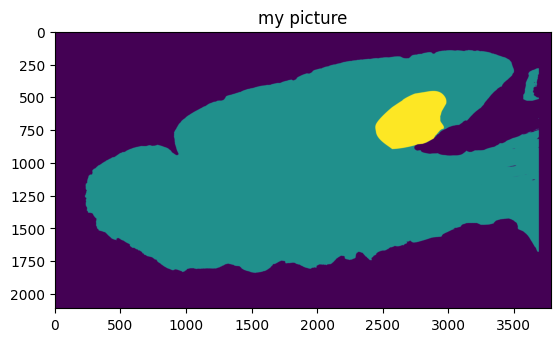

In [73]:
slice_filename = '/data/jhahn/data/tg/A0242_manual/A0242_sag_ssttd_pv488_cfosb_s001.png'
image = cv2.imread(slice_filename, cv2.IMREAD_COLOR)
print(image[0,0,:])
print(image.shape)
image = cv2.copyMakeBorder(image, 100, 100, 100, 100,cv2.BORDER_CONSTANT,value=[0,0,0])

#image = padding_to_image(image)
print(image.shape)
print(image[0,0,:])
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

canny_image = cv2.Canny(gray_image,100,200)

plt.imshow(gray_image)
plt.title('my picture')
plt.show()



In [ ]:

h, w, c = image.shape
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray_image,100,200)
canny_image

plt.imshow(canny_image)
plt.title('my picture')
plt.show()

In [301]:
isinstance(meshes[0] , trimesh.points.PointCloud)

True

In [292]:
def _check_connectivity( meshes):
        """
        Generate a connectivity matrix for the input meshes.
        args:
            meshes: list of trimesh objects
        returns:
            A numpy array where element (i, j) is True if meshes[i] and meshes[j] are connected.
        """
        num_meshes = len(meshes)
        connectivity_matrix = np.zeros((20, 20), dtype=bool)

        for i in range(num_meshes):
            for j in range(i + 1, num_meshes):  # Check each pair once
                if _are_meshes_connected(meshes[i], meshes[j]):
                    connectivity_matrix[i, j] = True
                    connectivity_matrix[j, i] = True  # Ensure symmetry for undirected graph

        return connectivity_matrix.astype(bool)
def _are_meshes_connected( mesh_a, mesh_b):
        """
        Check if two meshes share any vertices.
        
        Args:
            mesh_a, mesh_b (trimesh.Trimesh): The two mesh objects to compare.
            
        Returns:
            bool: True if the meshes share at least one vertex, False otherwise.
        """
        # Round vertices to a precision to mitigate floating-point issues
        precision = 5
        vertices_a = np.round(mesh_a.vertices, decimals=precision)
        vertices_b = np.round(mesh_b.vertices, decimals=precision)

        # Create a set of unique vertices for each mesh
        unique_vertices_a = set(map(tuple, vertices_a))
        unique_vertices_b = set(map(tuple, vertices_b))

        # Check if there is any intersection between the sets of unique vertices
        shared_vertices = unique_vertices_a.intersection(unique_vertices_b)

        return len(shared_vertices) > 0

TrackedArray([[-0.57922078,  0.03      ,  0.53846154],
              [ 0.05454545,  0.09      , -0.91497976],
              [-0.58961039,  0.04      ,  0.23481781],
              [ 0.7974026 ,  0.08      ,  0.46153846],
              [ 0.55844156,  0.08      , -0.048583  ],
              [ 0.27272727,  0.06      , -0.80161943],
              [-0.54285714,  0.03      ,  0.61133603],
              [ 0.53766234,  0.        , -0.49392713],
              [ 0.14805195,  0.1       , -0.73684211],
              [ 0.11688312,  0.08      ,  0.68016194]])

In [297]:
# Check if the meshes are connected
graph = _check_connectivity(meshes)

pcs = [
        #trimesh.sample.sample_surface(mesh, 1000)[0]
        mesh.vertices[np.random.choice(np.arange(len(mesh.vertices)), 1000)]
        for mesh in meshes
    ]

#return np.stack(pcs, axis=0), graph


/data/jhahn/slice_env/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/data/jhahn/slice_env/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


(([], []), ([], []))

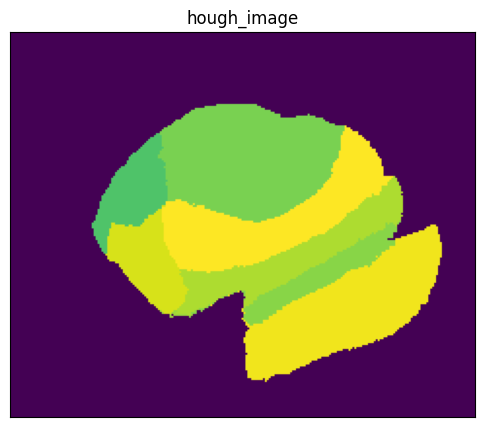

In [3]:


plt.figure(figsize=(8, 5))
plt.imshow(gray_image)
plt.title('hough_image')
plt.xticks([]), plt.yticks([])